In [ ]:
coarse_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

mapping = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}

In [1]:
import pickle

path = "/Users/blakeedwards/Desktop/Repos/research/neural-distiller-2/run-experiment/SoftTargets/cifar100_4_soft_targets.pkl"
filehandler = open(path, 'rb')
Y_train_new = pickle.load(filehandler)
Y_test_new = pickle.load(filehandler)

In [2]:
def find_largest_value(output_distribution):
    pos = 0
    max_val = output_distribution[pos]
    for i in range(1, len(output_distribution)):
        if output_distribution[i] > max_val:
            pos = i
            max_val = output_distribution[i]
    return max_val, pos

In [3]:
from pylab import *
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def get_correct(i):
    corr = []
    for i in range(0, i):
        one_hot_label = Y_train_new[i][:100]
        temp_softmax_logits = Y_train_new[i][100:]
        val, pos = find_largest_value(temp_softmax_logits)
        val_1, pos_1 = find_largest_value(one_hot_label)
        if pos == pos_1:
            corr.append(i)
    return corr

def graph(output):
    one_hot_label = output[:100]
    temp_softmax_logits = output[100:]
    val, pos = find_largest_value(temp_softmax_logits)
    val_1, pos_1 = find_largest_value(one_hot_label)
    print("predicted label: %i" % pos)
    print("true label: %i" % pos_1)
    print("predicted: %i" % coarse_label[pos])
    print("true: %i" % coarse_label[pos_1])

    x_axis = np.arange(len(temp_softmax_logits))
    plot(x_axis, temp_softmax_logits)
    # plot(x_axis, one_hot_label)

def graph_scaled(output):
    one_hot_label = output[:100]
    temp_softmax_logits = output[100:]
    val, pos = find_largest_value(temp_softmax_logits)
    val_1, pos_1 = find_largest_value(one_hot_label)
    scalar = 1.0/val
    temp_softmax_logits *= scalar
#     temp_softmax_logits = softmax(temp_softmax_logits)
    print("predicted label: %i" % pos)
    print("true label: %i" % pos_1)
    print("predicted: %i" % coarse_label[pos])
    print("true: %i" % coarse_label[pos_1])

    x_axis = np.arange(len(temp_softmax_logits))
    plot(x_axis, one_hot_label)
    plot(x_axis, temp_softmax_logits)

In [4]:
correct = get_correct(600)
i=100

predicted label: 42
true label: 42


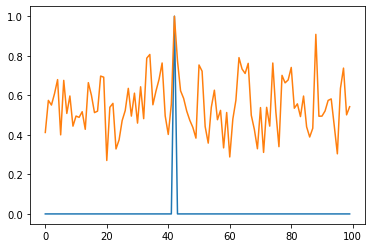

In [5]:
# graph(Y_train_new[correct[i]])
graph_scaled(Y_train_new[correct[i]])

predicted label: 82
true label: 82


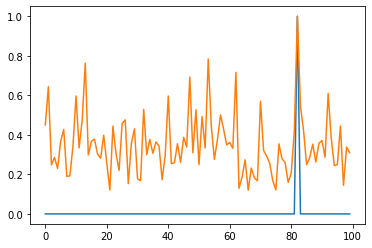

In [6]:
graph_scaled(Y_train_new[correct[i+1]])

predicted label: 68
true label: 68


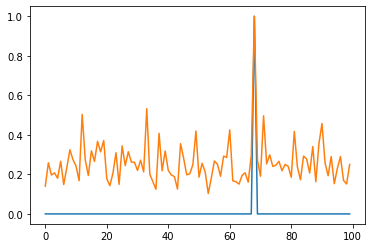

In [7]:
graph_scaled(Y_train_new[correct[i+2]])

predicted label: 60
true label: 60


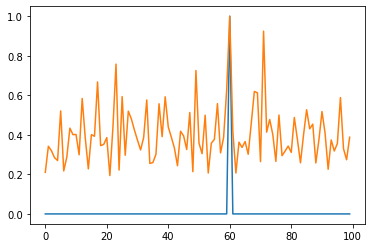

In [8]:
graph_scaled(Y_train_new[correct[i+3]])

predicted label: 30
true label: 30


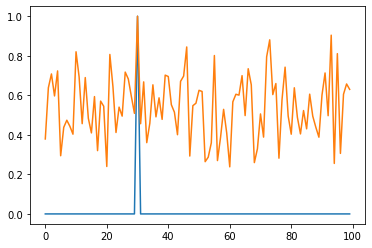

In [9]:
graph_scaled(Y_train_new[correct[i+4]])

predicted label: 82
true label: 82


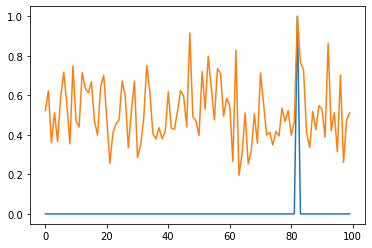

In [10]:
graph_scaled(Y_train_new[correct[i+5]])

predicted label: 20
true label: 20


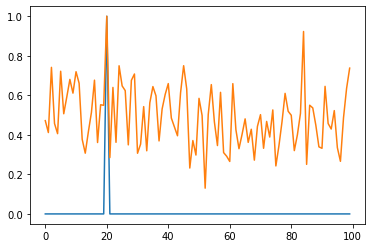

In [11]:
graph_scaled(Y_train_new[correct[i+6]])

predicted label: 75
true label: 75


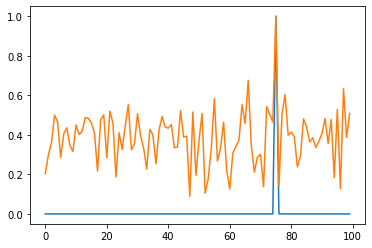

In [12]:
graph_scaled(Y_train_new[correct[i+7]])

predicted label: 57
true label: 57


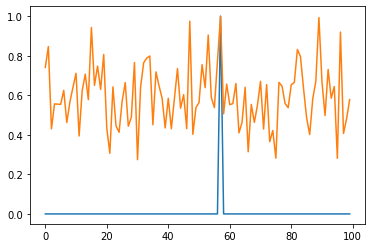

In [13]:
graph_scaled(Y_train_new[correct[i+8]])

predicted label: 73
true label: 73


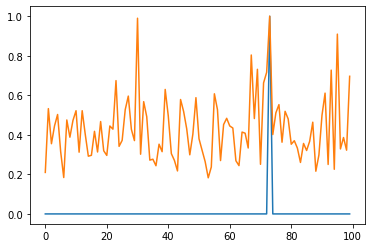

In [14]:
graph_scaled(Y_train_new[correct[i+9]])